<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/Estimadores_Volatilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

Nesse projeto iremos estudar estimadores de volatilidade histórica, verificando os pontos fortes e fracos de cada uma dessas estimativas.

In [2]:
from yahooquery import Ticker
petr = Ticker("PETR4.SA")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving estimadoresvol.jpg to estimadoresvol (2).jpg


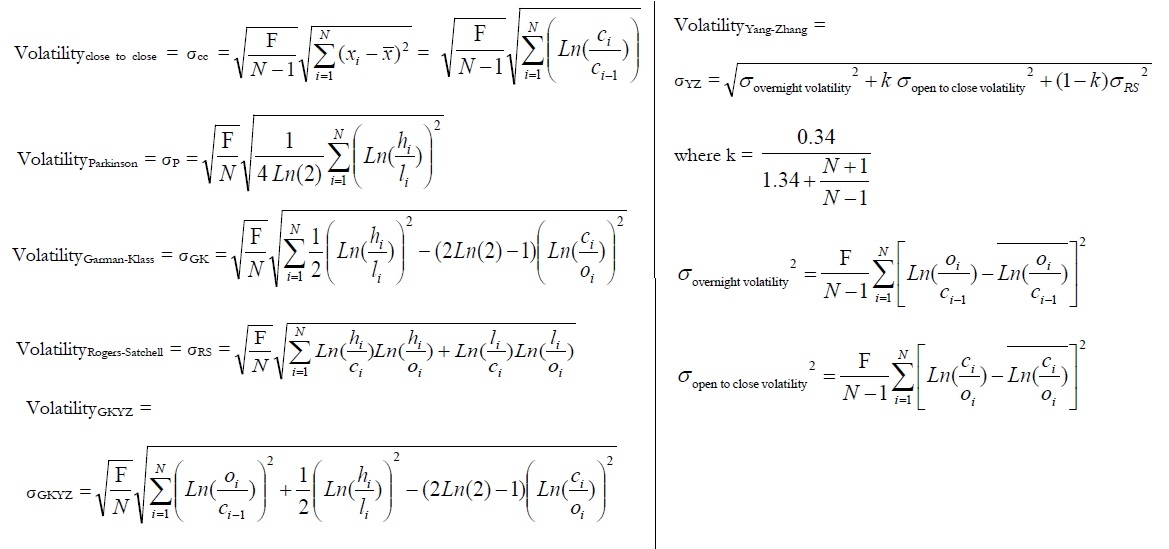

-1

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('estimadoresvol.jpg')
cv2_imshow(img)
cv2.waitKey()

Na Imagem, F é igual à frequência de retornos em um ano (252 para retornos diários, por exemplo)

Close to close (C): É o estimador mais comum de volatilidade histórica. Utiliza apenas os preços de fechamento. Não leva em consideração a tendência e os gaps dos preços entre dias diferentes.

Parkinson (HL): Ao contrário do modelo Close-to-Close, esse estimador leva em consideração a máxima e mínima do dia, sendo útil em comparação com o estimador anterior quando os preços se movimentam durante o dia, mas acabam fechando próximo ao fechamento do dia anterior. Como o estimador de Parkinson não leva em consideração GAPS entre dias diferentes, tende a subestimar a volatilidade.

Garman-Klass (OHLC): O Modelo de Garman-Klass é uma extensão do modelo de Parkinson, pois acrescenta a abertura e fechamento do dia em seus cálculos. Porém, como desconsidera gaps de abertura e não leva em consideração a tendência do ativo, também tende a subestimar a volatilidade.

Rogers-Satchell (OHLC):Ao contrário dos estimadores de Parkinson e Garman-Klass, o estimador de Rogers-Satchell incorpora tendência nos seus cálculos. No entanto, não é ajustado para lidar com gaps de abertura.

Garman-Klass Yang-Zhang extension (OHLC): Yang-Zhang modificou o método de Garman-
Klass de modo que lidasse com gaps, mas assume drift igual a zero.

Yang-Zhang (OHLC): É o estimador de volatilidade histórica mais preciso. É capaz de lidar tanto com gaps nos preços quanto com ativos que estejam em tendência.

In [5]:
df1=petr.history(start="2019-11-01",end="2021-01-01",interval='1d')
type(df1)

pandas.core.frame.DataFrame

In [6]:
df1.shape

(285, 7)

In [7]:
df1.isnull().sum()

high         0
close        0
open         0
low          0
volume       0
adjclose     0
dividends    0
dtype: int64

In [8]:
df1.head(20)

high      close  ...   adjclose  dividends
symbol   date                              ...                      
PETR4.SA 2019-11-01  31.230000  30.430000  ...  29.814350   0.000000
         2019-11-04  31.219999  30.360001  ...  29.745768   0.000000
         2019-11-05  30.600000  29.650000  ...  29.050133   0.000000
         2019-11-06  30.700001  29.709999  ...  29.108919   0.000000
         2019-11-07  31.070000  30.900000  ...  30.274843   0.000000
         2019-11-08  30.790001  30.020000  ...  29.412649   0.000000
         2019-11-11  30.450001  30.450001  ...  29.833948   0.000000
         2019-11-12  30.610001  30.020000  ...  29.608017   0.200925
         2019-11-13  30.129999  29.900000  ...  29.489664   0.000000
         2019-11-14  30.100000  29.299999  ...  28.897898   0.000000
         2019-11-18  29.850000  29.080000  ...  28.680916   0.000000
         2019-11-19  29.490000  28.780001  ...  28.385035   0.000000
         2019-11-21  29.850000  29.850000  ...  29.440350   0.000000
         2019-11-22  30.340000  29.980000  ...  29.568565   0.000000
         2019-11-25  30.100000  29.730000  ...  29.321997   0.000000
         2019-11-26  29.730000  29.190001  ...  28.789408   0.000000
         2019-11-27  29.650000  29.330000  ...  28.927486   0.000000
         2019-11-28  29.540001  29.530001  ...  29.124743   0.000000
         2019-11-29  29.559999  29.150000  ...  28.749958   0.000000
         2019-12-02  29.500000  29.070000  ...  28.671053   0.000000

[20 rows x 7 columns]

In [9]:
df1=df1[['open','low','high','adjclose']]
df1.head(20)

open        low       high   adjclose
symbol   date                                                  
PETR4.SA 2019-11-01  30.590000  29.840000  31.230000  29.814350
         2019-11-04  30.889999  29.959999  31.219999  29.745768
         2019-11-05  30.410000  29.580000  30.600000  29.050133
         2019-11-06  30.049999  28.100000  30.700001  29.108919
         2019-11-07  30.000000  29.540001  31.070000  30.274843
         2019-11-08  30.450001  29.930000  30.790001  29.412649
         2019-11-11  29.850000  29.790001  30.450001  29.833948
         2019-11-12  30.040001  30.010000  30.610001  29.608017
         2019-11-13  29.950001  29.610001  30.129999  29.489664
         2019-11-14  29.879999  29.270000  30.100000  28.897898
         2019-11-18  29.700001  29.070000  29.850000  28.680916
         2019-11-19  29.250000  28.730000  29.490000  28.385035
         2019-11-21  28.930000  28.879999  29.850000  29.440350
         2019-11-22  29.760000  29.559999  30.340000  29.568565
         2019-11-25  29.920000  29.629999  30.100000  29.321997
         2019-11-26  29.620001  29.100000  29.730000  28.789408
         2019-11-27  29.350000  29.139999  29.650000  28.927486
         2019-11-28  29.320000  28.809999  29.540001  29.124743
         2019-11-29  29.490000  29.010000  29.559999  28.749958
         2019-12-02  29.400000  29.070000  29.500000  28.671053

In [10]:
df1["C/C(-1)-1"]=df1['adjclose']/df1['adjclose'].shift(1)-1

In [11]:
df1["log^2(H/L)"]=np.power(np.log(df1['high']/df1['low']),2)

In [12]:
df1["log^2(C/O)"]=np.power(np.log(df1['adjclose']/df1['open']),2)

In [13]:
df1["GK"]=0.5*df1["log^2(H/L)"]+(2*np.log(2)-1)*df1["log^2(C/O)"]

In [14]:
df1["o"]=np.log(df1["open"]/df1['adjclose'].shift(1))

In [15]:
df1["u"]=np.log(df1["high"]/df1["open"])

In [16]:
df1["d"]=np.log(df1["low"]/df1["open"])

In [17]:
df1["c"]=np.log(df1["adjclose"]/df1["open"])

In [18]:
df1["RS"]=np.log(df1["high"]/df1["adjclose"])*np.log(df1["high"]/df1["open"])+np.log(df1["low"]/df1["adjclose"])*np.log(df1["low"]/df1["open"])

In [19]:
df1["Rogers-Satchell"]=np.sqrt(df1["RS"].rolling(20).mean())*np.sqrt(252)*100

In [20]:
df1["Parkinson"]=np.sqrt(df1["log^2(H/L)"].rolling(20).mean()/4*np.log(2))*np.sqrt(252)*100

In [21]:
df1["Garman-Klass"]=np.sqrt(df1["GK"].rolling(20).mean())*np.sqrt(252)*100

In [22]:
df1["Close-to-Close"]=df1["C/C(-1)-1"].rolling(20).std()*np.sqrt(252)*100

In [23]:
k=0.34/(1.34+(21/19))

In [24]:
df1["Yang And Zang"]=np.sqrt(np.power(df1["o"].rolling(20).std(),2)+k*np.power(df1["c"].rolling(20).std(),2)+(1-k)*df1["RS"].rolling(20).mean())*np.sqrt(252)*100

In [25]:
df1["GKYZ"]=np.sqrt((np.power(df1["o"],2)+0.5*df1["log^2(H/L)"]-(2*np.log(2)-1)*np.power(df1["c"],2)).rolling(20).mean())*np.sqrt(252)*100

In [26]:
df1.head(40)

open        low  ...  Yang And Zang       GKYZ
symbol   date                              ...                          
PETR4.SA 2019-11-01  30.590000  29.840000  ...            NaN        NaN
         2019-11-04  30.889999  29.959999  ...            NaN        NaN
         2019-11-05  30.410000  29.580000  ...            NaN        NaN
         2019-11-06  30.049999  28.100000  ...            NaN        NaN
         2019-11-07  30.000000  29.540001  ...            NaN        NaN
         2019-11-08  30.450001  29.930000  ...            NaN        NaN
         2019-11-11  29.850000  29.790001  ...            NaN        NaN
         2019-11-12  30.040001  30.010000  ...            NaN        NaN
         2019-11-13  29.950001  29.610001  ...            NaN        NaN
         2019-11-14  29.879999  29.270000  ...            NaN        NaN
         2019-11-18  29.700001  29.070000  ...            NaN        NaN
         2019-11-19  29.250000  28.730000  ...            NaN        NaN
         2019-11-21  28.930000  28.879999  ...            NaN        NaN
         2019-11-22  29.760000  29.559999  ...            NaN        NaN
         2019-11-25  29.920000  29.629999  ...            NaN        NaN
         2019-11-26  29.620001  29.100000  ...            NaN        NaN
         2019-11-27  29.350000  29.139999  ...            NaN        NaN
         2019-11-28  29.320000  28.809999  ...            NaN        NaN
         2019-11-29  29.490000  29.010000  ...            NaN        NaN
         2019-12-02  29.400000  29.070000  ...            NaN        NaN
         2019-12-03  29.170000  28.730000  ...      33.027682  41.295726
         2019-12-04  29.260000  29.110001  ...      32.313456  40.009386
         2019-12-05  29.639999  29.520000  ...      33.490174  40.542286
         2019-12-06  30.150000  30.129999  ...      27.031821  33.230544
         2019-12-09  30.299999  30.120001  ...      23.681137  29.102201
         2019-12-10  30.100000  29.900000  ...      23.354044  29.724646
         2019-12-11  30.510000  30.260000  ...      22.499261  29.283621
         2019-12-12  30.639999  30.480000  ...      21.482591  30.289893
         2019-12-13  30.889999  29.870001  ...      21.068718  29.978268
         2019-12-16  30.049999  29.410000  ...      20.613484  29.917895
         2019-12-17  29.639999  29.430000  ...      20.756333  29.803143
         2019-12-18  29.750000  29.700001  ...      21.812752  29.988938
         2019-12-19  30.450001  30.420000  ...      20.683353  28.609983
         2019-12-20  30.600000  30.020000  ...      18.982443  27.905804
         2019-12-23  30.190001  30.030001  ...      19.298355  28.224335
         2019-12-26  30.590000  30.500000  ...      19.785754  29.006884
         2019-12-27  30.690001  30.290001  ...      19.987838  28.575826
         2019-12-30  30.549999  30.150000  ...      20.053188  27.759313
         2020-01-02  30.510000  30.309999  ...      20.580988  27.996339
         2020-01-03  30.879999  30.450001  ...      21.379364  27.820495

[40 rows x 19 columns]

In [27]:
df2=pd.DataFrame(data=df1,columns=["Close-to-Close","Parkinson","Rogers-Satchell","Garman-Klass","GKYZ","Yang And Zang"])

In [28]:
df2.tail()

Close-to-Close  Parkinson  ...       GKYZ  Yang And Zang
symbol   date                                   ...                          
PETR4.SA 2020-12-22       33.088569  17.923146  ...  36.434132      36.466362
         2020-12-23       34.021124  17.944842  ...  36.282466      36.313448
         2020-12-28       33.239507  17.892765  ...  36.318639      36.280712
         2020-12-29       33.236325  17.916426  ...  36.403827      36.403112
         2020-12-30       29.166422  16.927890  ...  34.064876      33.549191

[5 rows x 6 columns]

In [29]:
df2.iloc[-1]

Close-to-Close     29.166422
Parkinson          16.927890
Rogers-Satchell    27.173607
Garman-Klass       30.667865
GKYZ               34.064876
Yang And Zang      33.549191
Name: (PETR4.SA, 2020-12-30), dtype: float64

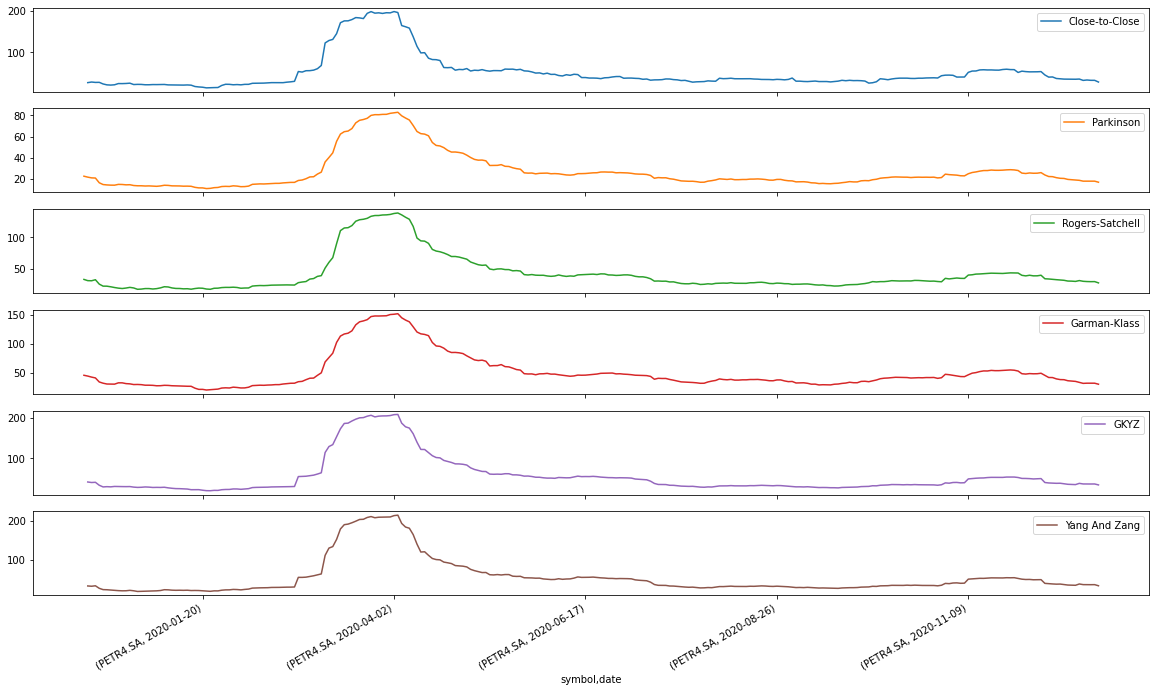

In [30]:
df2.plot(subplots=True, figsize=(20,12)); plt.legend(loc='best')

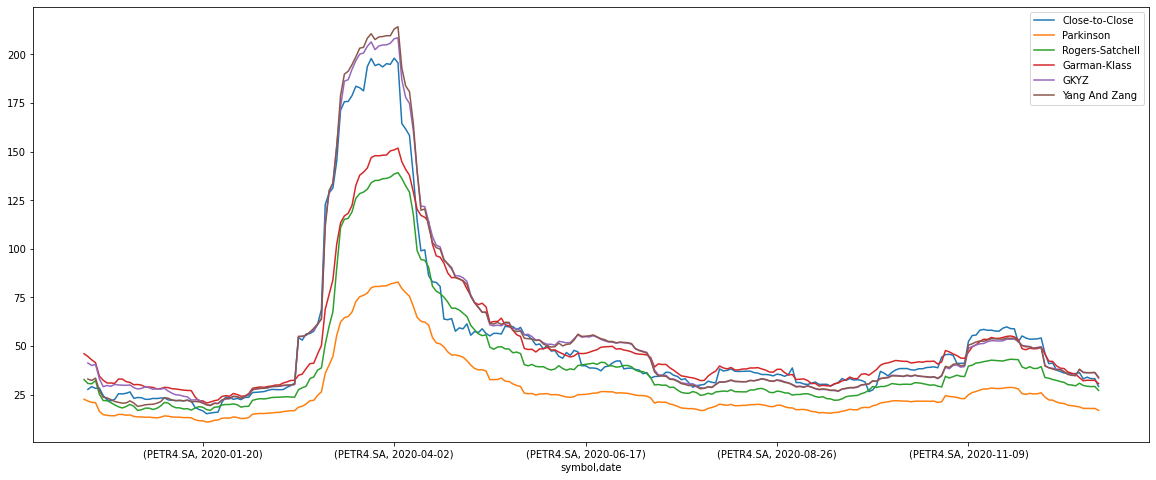

In [31]:
df2.plot(subplots=False, figsize=(20,8)); plt.legend(loc='best')

Aplicações: Além da tradicional comparação entre Volatilidade Implícita e Volatilidade Histórica para avaliarmos o quão caro ou barato está a volatilidade, podemos utilizar diferentes métodos de estimação de volatilidade histórica para detectar a dinâmica de tendência/reversão à média. Iremos definir a medida "Variance Ratio" como a razão entre uma medida de volatilidade que considere a dinâmica intraday/gaps de abertura e a volatilidade close-to-close. Utilizei uma média de 20 períodos para suavizar o indicador.

In [32]:
Variance_Ratio=(df2["Yang And Zang"]/df2["Close-to-Close"]).rolling(20).mean()

In [33]:
DF=pd.concat([Variance_Ratio,df1['adjclose']],axis=1)

In [34]:
DF.dropna(axis=0,inplace=True)

In [35]:
DF.columns=["Variance_Ratio",'adjclose']

In [36]:
DF

Variance_Ratio   adjclose
symbol   date                                 
PETR4.SA 2020-01-03        0.933427  30.447748
         2020-01-06        0.924035  30.807720
         2020-01-07        0.920492  30.687731
         2020-01-08        0.911512  30.497744
         2020-01-09        0.913884  30.397753
...                             ...        ...
         2020-12-22        0.959464  27.280001
         2020-12-23        0.967088  27.950001
         2020-12-28        0.975614  28.180000
         2020-12-29        0.980131  28.270000
         2020-12-30        0.992008  28.340000

[246 rows x 2 columns]

[]

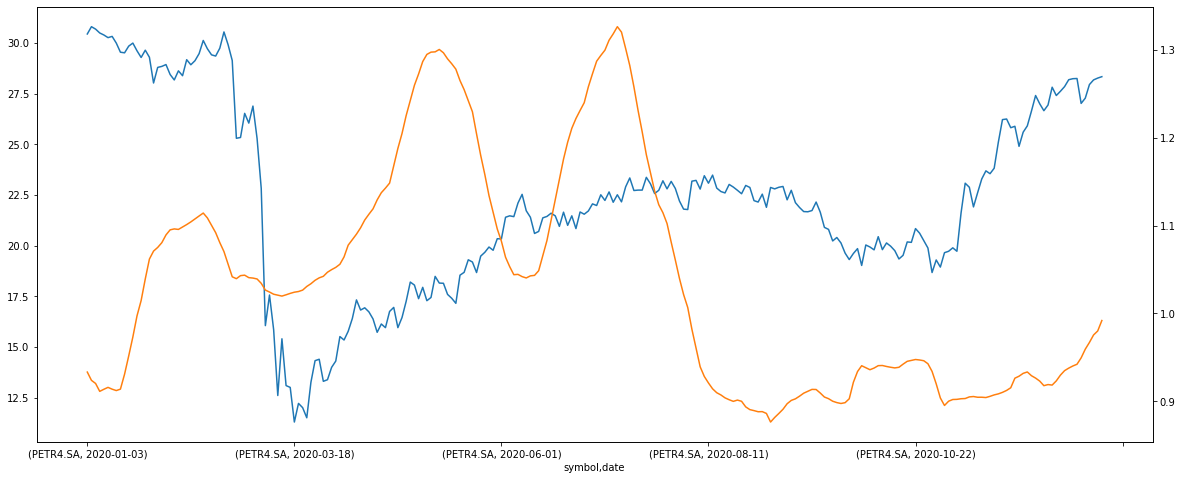

In [37]:
plt.figure()
DF['adjclose'].plot(figsize=(20,8))
DF["Variance_Ratio"].plot(figsize=(20,8),secondary_y=True)
plt.plot()

Pelo gráfico, chama a atenção as regiões em que o indicador Variance_Ratio está em regiões extremas. Indicando uma possível transição na dinâmica de reversão a média/tendência. O ponto mais alto do indicador nesse intervalo coincidiu com um momento de consolidação nos preços da petrobrás (sucessivas reversões), enquanto o forte rally nos meses de Novembro e Dezembro surgiram com o indicador em patamares baixos, corroborando uma situação de tendência.